# Project: No-show appointments data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

we study a dataset "No-show appointments" that collects information from 100k medical appointments in Brazil.
<br>we are focused on the question of whether or not patients show up for their appointment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Check out if the sample is for unique patients or repatative patients:**

In [5]:
df['PatientId'].value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64

***Examine descriptive statistics:***

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning (Replace this with more specific notes!)

***For Handcap, the values should be 0 or 1 but from discriptive statistics the max is 4, so we tackle that:***

In [7]:
target_values=df.query('Handcap!=1 and Handcap!=0')['Handcap'].unique()
target_values

array([2, 3, 4], dtype=int64)

In [8]:
df['Handcap']=df['Handcap'].replace(target_values,1)

df['Handcap'].unique()


array([0, 1], dtype=int64)

***Check for Null values:***

In [9]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

***Check for duplicates:***

In [10]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


***we look at the overall dataset and get percentage of both people attended and did't attend.***
<br>
***people who attended they are refered as No, whereas people who didn't attend they are refered as Yes.***

In [11]:
# we get number of people who attended and didn't attend:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

***percentage of both people attended and didn't attend:***

In [12]:
df['No-show'].value_counts()/df.shape[0]

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

### Research Question 1: Do the following 6 factors affect the attendance?
***we have 6 factors or criteria: Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received.***
<br>
we get the total number of the people who have a cerain criterion, and get the number of people who attend or don't for these particular people have this criterion.
<br>
i.e we cacluate the total number of people who received SMS and split thier number to who attended or didn't and calculate the ratio of attendance.
<br> ***then we draw bar charts for each factor for No(the attendants) and Yes(abscent)***

No-show
No     0.762637
Yes    0.237363
Name: Scholarship, dtype: float64
No-show
No     0.82698
Yes    0.17302
Name: Hipertension, dtype: float64
No-show
No     0.819967
Yes    0.180033
Name: Diabetes, dtype: float64
No-show
No     0.798512
Yes    0.201488
Name: Alcoholism, dtype: float64
No-show
No     0.818385
Yes    0.181615
Name: Handcap, dtype: float64
No-show
No     0.724255
Yes    0.275745
Name: SMS_received, dtype: float64


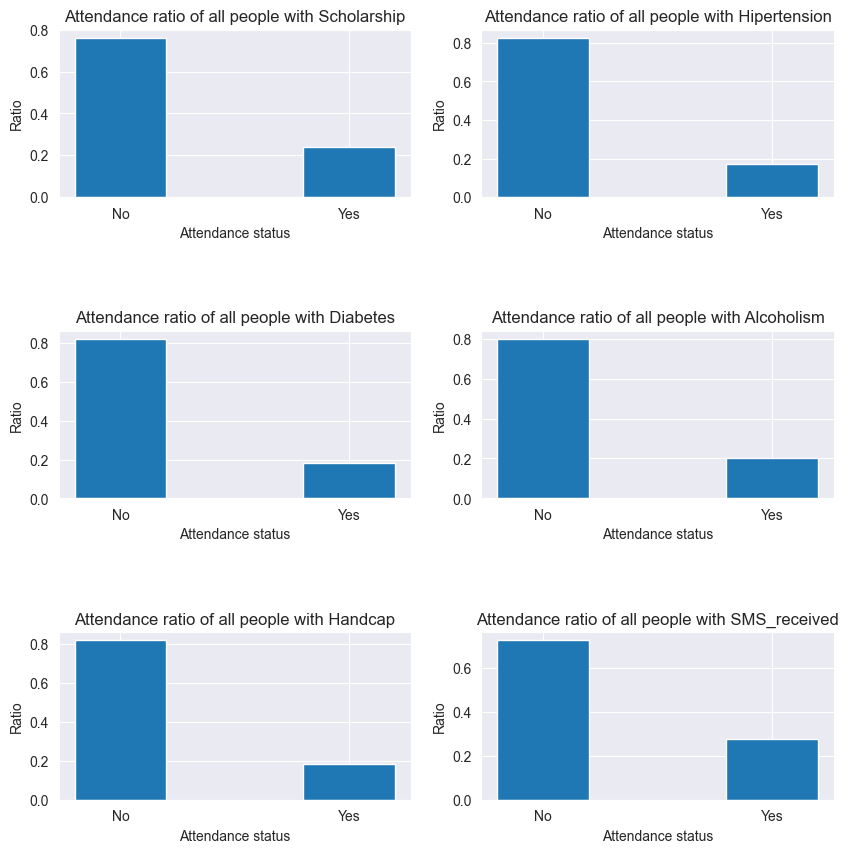

In [13]:
criteria =['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.8)

x=-1
for criterion in criteria:
    study_ratio=df.groupby('No-show')[criterion].sum()/df[criterion].value_counts()[1]
    x+= 1
    ax = plt.subplot(3, 2, x+1)
    ax.bar(["No", "Yes"], study_ratio, alpha=1,width = 0.4)
    ax.set_title("Attendance ratio of all people with {}".format(criterion))
    ax.set_xlabel("Attendance status")
    ax.set_ylabel("Ratio")
    print(study_ratio)

***Notes on above plots:***
<br>1-the ratio of attended people with any criterion is as high from 72% to 83% , that gives a meaning that all above criteria are effective and made the people decisive to attend the appointment.
<br>2- the hightest ratio of attendance fo all above 6 criteria is 83% for people have Hipertension.
<br> 3-the lowest ratio of attendance fo all above 6 criteria is 72% for people received SMS.

### Research Question 2: Does gender affect the attendance?
we will get ratio of the males attended with respect to all males in the dataset, as well females, then we compare the male ratio to female ratio to see if there is a gender tends to attend or miss the appointment.

In [14]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [15]:
# getting the shared gender as a ratio of the total sample
all_genders_ratio = df['Gender'].value_counts()/df['Gender'].count()
all_genders_ratio

F    0.649977
M    0.350023
Name: Gender, dtype: float64

In [16]:
# we create function to plot the bar chart
def bar_drawing(bar_name_list,df,plt_title,plt_xlabel,plt_ylabel):
    ''''plots bar chart inputing the bar information as dataframe, bar names list, plot title and axes lables  '''
    
    
    fig = plt.figure()
    fig.set_figwidth(4)
    fig.set_figheight(2)
    
    plt.bar(bar_name_list, df, alpha=1,width = 0.4)
    
    plt.title(plt_title)
    plt.xlabel(plt_xlabel)
    plt.ylabel(plt_ylabel);   
    
 

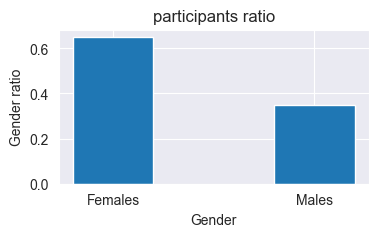

In [17]:
# call bar_drawing function to plot for genders as a ratio of all dataset participants:
bar_drawing(["Females", "Males"],all_genders_ratio,"participants ratio","Gender","Gender ratio")   

***Notes on plot:*** females consist about 65% of the total dataset

In [18]:
# we filter more for the males and females numbers who attended and didn't
df_gender = df.groupby(['No-show','Gender'],as_index =False)['Gender'].count()
df_gender

,No-show,Gender
0,No,57246
1,No,30962
2,Yes,14594
3,Yes,7725


In [19]:
# the attendant females as a ratio of all females participated in the sample:
females_attendance_ratio = df_gender['Gender'][0]/df['Gender'].value_counts()[0]
# the attendant males as a ratio of all males participated in the sample:
males_attendance_ratio = df_gender['Gender'][1]/df['Gender'].value_counts()[1]

In [20]:
gender_proportional_attendance = [females_attendance_ratio,males_attendance_ratio]
gender_proportional_attendance

[0.7968541202672605, 0.8003205211052808]

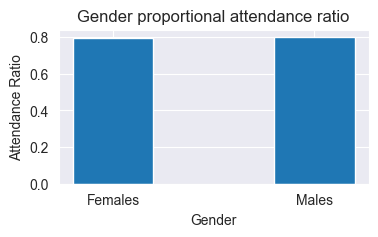

In [21]:
# call bar_drawing function to plot the gender attendance ratio proportionated to each gender total number in the sample 
bar_drawing(["Females", "Males"],gender_proportional_attendance,"Gender proportional attendance ratio","Gender","Attendance Ratio") 

***Notes on plot:*** 
<br>1-males and females attendance ratio is almost the same and equals 80% proportionated to the overall dataset for each gender.
<br>2- that gives a meaning that the gender doenst affect the attendance decission.

### Research Question 3: Does age affect the attendance?

we will draw histograms for ages for both attendance and abscence groups and compare and see if we have special ages:

In [22]:
df.groupby('No-show',as_index =False)['Age'].value_counts()
df.groupby('No-show',as_index =False)['Age'].head()

0     62
1     56
2     62
3      8
4     56
6     23
7     39
11    29
17    40
20    30
Name: Age, dtype: int64

In [23]:
# we get the series of the ages for the attendants only
df_no=df[df['No-show'] == "No"]
df_no['Age'].describe()

count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [24]:
# create function to plot the historgram
def histogram_drawing(series,plt_title,plt_xlabel,plt_ylabel):
    '''plots histogram, inputs: dataset as series, plot title and axes labels'''
    fig = plt.figure()
    fig.set_figwidth(4)
    fig.set_figheight(2)

    plt.title(plt_title)
    plt.xlabel(plt_xlabel)
    plt.ylabel(plt_ylabel)

    series.hist(bins=10);

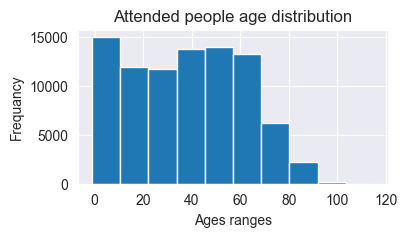

In [25]:
# call histogram_drawing function to plot the age distribution for the attendance:
histogram_drawing(df_no['Age'],"Attended people age distribution","Ages ranges","Frequancy")

***Notes on plot:*** 
the histogram is skewed as we see the children number has the heighst number of attendance.

In [26]:
# we get the series of the ages for the abscence only
df_yes=df[df['No-show'] == "Yes"]
df_yes['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

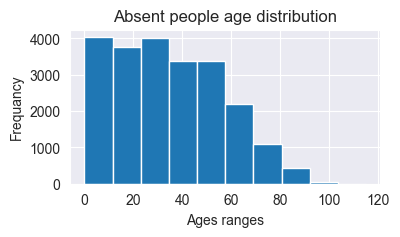

In [27]:
# call histogram_drawing function to plot the age distribution for the absent people:
histogram_drawing(df_yes['Age'],"Absent people age distribution","Ages ranges","Frequancy")

***Notes on plot:*** 
<br>1-the histogram is skewed as we see the children number has the heighst number of abscence.
<br>2- this histogram ages distribution is simillar to that for who attended. that gives a meaning that the age doesn't govern the attendance ratio for the datset sample.

### Research Question 4: Does neighbourhood affect the attendance?

we calculate the ratio of attendance per neighbourhood = (attendants/ total attendants) per neighbourhood.

In [28]:
# we get the total number of people per neighbourhood
df_nbrhd=df.groupby('Neighbourhood',as_index=False)['Neighbourhood'].value_counts()
df_nbrhd

,Neighbourhood,count
0,AEROPORTO,8
1,ANDORINHAS,2262
2,ANTÔNIO HONÓRIO,271
3,ARIOVALDO FAVALESSA,282
4,BARRO VERMELHO,423
...,...,...
76,SÃO JOSÉ,1977
77,SÃO PEDRO,2448
78,TABUAZEIRO,3132
79,UNIVERSITÁRIO,152


***we get the number of attendants by first grouping who attended and didn't then extracting the attendants:***

In [29]:
df_nbrhd_no_yes=df.groupby('No-show',as_index=False)['Neighbourhood'].value_counts()
df_nbrhd_no_yes

,No-show,Neighbourhood,count
0,No,JARDIM CAMBURI,6252
1,No,MARIA ORTIZ,4586
2,No,RESISTÊNCIA,3525
3,No,JARDIM DA PENHA,3246
4,No,SANTA MARTHA,2635
...,...,...,...
155,Yes,PONTAL DE CAMBURI,12
156,Yes,ILHA DO BOI,3
157,Yes,ILHAS OCEÂNICAS DE TRINDADE,2
158,Yes,ILHA DO FRADE,2


In [30]:
# we get the no. of people who attend per neighbourhood:
df_nbrhd_no= df_nbrhd_no_yes[df_nbrhd_no_yes['No-show'] == "No"]
df_nbrhd_no

,No-show,Neighbourhood,count
0,No,JARDIM CAMBURI,6252
1,No,MARIA ORTIZ,4586
2,No,RESISTÊNCIA,3525
3,No,JARDIM DA PENHA,3246
4,No,SANTA MARTHA,2635
...,...,...,...
75,No,PONTAL DE CAMBURI,57
76,No,ILHA DO BOI,32
77,No,ILHA DO FRADE,8
78,No,AEROPORTO,7


***Here we merge dataframe of all people per neighbourhood with the datafrme of the people attended per neighbourhood:***

In [31]:
df_combined=pd.merge(df_nbrhd,df_nbrhd_no,suffixes=('_Total', '_No'), on='Neighbourhood', how='left')
df_combined

,Neighbourhood,count_Total,No-show,count_No
0,AEROPORTO,8,No,7.0
1,ANDORINHAS,2262,No,1741.0
2,ANTÔNIO HONÓRIO,271,No,221.0
3,ARIOVALDO FAVALESSA,282,No,220.0
4,BARRO VERMELHO,423,No,332.0
...,...,...,...,...
76,SÃO JOSÉ,1977,No,1549.0
77,SÃO PEDRO,2448,No,1933.0
78,TABUAZEIRO,3132,No,2559.0
79,UNIVERSITÁRIO,152,No,120.0


In [32]:
# we create a column where we divid the people attended per neighbourhood / all people per neighbourhood
#but first we handle nulls values if there are nulls neighbourhoods where all people were abscent
df_combined.isnull().sum()

Neighbourhood    0
count_Total      0
No-show          1
count_No         1
dtype: int64

In [33]:
df_combined['count_No'] = df_combined['count_No'].fillna(0)
df_combined['No-show'] = df_combined['No-show'].fillna("No")

In [34]:
df_combined['Attendance_ratio'] = df_combined['count_No']/df_combined['count_Total']
df_combined.sort_values(by=['Attendance_ratio'], inplace=True)
df_combined

,Neighbourhood,count_Total,No-show,count_No,Attendance_ratio
34,ILHAS OCEÂNICAS DE TRINDADE,2,No,0.0,0.000000
70,SANTOS DUMONT,1276,No,907.0,0.710815
61,SANTA CECÍLIA,448,No,325.0,0.725446
62,SANTA CLARA,506,No,372.0,0.735178
36,ITARARÉ,3514,No,2591.0,0.737336
...,...,...,...,...,...
73,SOLON BORGES,469,No,400.0,0.852878
48,MÁRIO CYPRESTE,371,No,317.0,0.854447
0,AEROPORTO,8,No,7.0,0.875000
31,ILHA DO BOI,35,No,32.0,0.914286


In [35]:
df_combined['Attendance_ratio'].describe()

count    81.000000
mean      0.794573
std       0.097230
min       0.000000
25%       0.782546
50%       0.802412
75%       0.820093
max       1.000000
Name: Attendance_ratio, dtype: float64

<a id='conclusions'></a>
## Conclusions




### 1-Factors affect patients appointment attendance are as follow:
<br>we have 6 factors affect the attendance of the patients, these factors are:
***<br>1-Scholarship*** 
***<br>2-Hipertension***
***<br>3-Diabetes***
***<br>4-,Alcoholism***
***<br>5-Handcapand***
***<br>6-SMS received***
<br> for every single factor above we found that about 80% of people who have this factor already attended the appointment.

### 2-Factors don't affect patients appointment attendance are as follow:
<br>we have 3 factors don't affect the attendance of the patients, these factors are:
***<br>1-Gender***
<br>we found the gender doesn't affect the attendance as about 80% of the males and 80% of the female already attended the appoitment with respect to the number of each gender of the total dataset.
***<br>2-Neighbourhood***
<br> we found that for every single neighbourhood, there is about 80% of the resedents already attended the appointment.
***<br>3-Age***
<br>although tendancy of the attendants average age is 37 older than abscent average age is 34, 
<br>but the histogram distribution of the ages for both abscence and attendance still looks simillar.

### 3-Limitations affect patients appointment attendance are as follow:
***1-distance between patient home and clinic***
<br> that could have effect on attendance dicission ecpecially the aged people.
<br>***2-appointment hours all are reset to 00:00:00.***
<br>that could be a good reason that people cancel their appointments like during the people working hours or traffic peak hours.